<a href="https://colab.research.google.com/github/axrd/DS-Unit-2-Sprint-3-Advanced-Regression/blob/master/Alejandro_Ruperti_DS_Unit_2_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 2 Sprint Challenge 3

## Logistic Regression and Beyond

In this sprint challenge you will fit a logistic regression modeling the probability of an adult having an income above 50K. The dataset is available at UCI:

https://archive.ics.uci.edu/ml/datasets/adult

Your goal is to:

1. Load, validate, and clean/prepare the data.
2. Fit a logistic regression model
3. Answer questions based on the results (as well as a few extra questions about the other modules)

Don't let the perfect be the enemy of the good! Manage your time, and make sure to get to all parts. If you get stuck wrestling with the data, simplify it (if necessary, drop features or rows) so you're able to move on. If you have time at the end, you can go back and try to fix/improve.

### Hints

It has a variety of features - some are continuous, but many are categorical. You may find [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) (a method to one-hot encode) helpful!

The features have dramatically different ranges. You may find [sklearn.preprocessing.minmax_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale) helpful!

## Part 1 - Load, validate, and prepare data

The data is available at: https://archive.ics.uci.edu/ml/datasets/adult

Load it, name the columns, and make sure that you've loaded the data successfully. Note that missing values for categorical variables can essentially be considered another category ("unknown"), and may not need to be dropped.

You should also prepare the data for logistic regression - one-hot encode categorical features as appropriate.

In [0]:
# TODO - your work!

# Import tools:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [25]:
# Loading the data and naming the columns:
adult_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                                                                                                       'marital-status', 'occupation', 'relationship', 'race', 'sex',
                                                                                                       'cap-gain', 'cap-loss', 'hrs-week', 'native-country', '50K'])
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,cap-gain,cap-loss,hrs-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
# We've got an assortment of numerica and categorical features. 
# There appear to be some redundant features: 'education-num', and 'relationship'
# Education-num is basically a numerically encoded version of education. Will drop the latter. 

# We'll encode the categorical features so missing values will be treated as their own 
# cateogory. Luckily our target variable '50K' doesn't have any missing values for us to deal with.

adult_df.drop(['education', 'relationship'], axis=1, inplace=True)

In [0]:
# Encoding categorical features as numbers using Scikit-Learn Label Encoder:
def num_encode_feat(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders
  
encoded_data, encoders = num_encode_feat(adult_df)
new_df = encoded_data

## Part 2 - Fit and present a Logistic Regression

Your data should now be in a state to fit a logistic regression. Use scikit-learn, define your `X` (independent variable) and `y`, and fit a model.

Then, present results - display coefficients in as interpretible a way as you can (hint - scaling the numeric features will help, as it will at least make coefficients more comparable to each other). If you find it helpful for interpretation, you can also generate predictions for cases (like our 5 year old rich kid on the Titanic) or make visualizations - but the goal is your exploration to be able to answer the question, not any particular plot (i.e. don't worry about polishing it).

It is *optional* to use `train_test_split` or validate your model more generally - that is not the core focus for this week. So, it is suggested you focus on fitting a model first, and if you have time at the end you can do further validation.

In [54]:
# Split and Scale the data w/ 0.75 training size:
y = new_df['50K']
X = new_df.drop('50K', axis = 1)

model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [57]:
# TODO - your work!

model.fit(X, y)
model.score(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.79174472528485

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'race', 'sex', 'cap-gain', 'cap-loss', 'hrs-week',
       'native-country'],
      dtype='object')


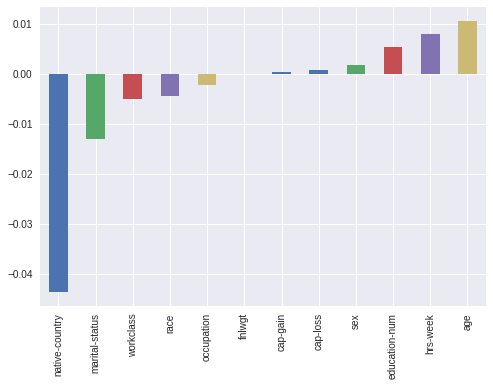

age               0.010703
hrs-week          0.007997
education-num     0.005341
sex               0.001789
cap-loss          0.000761
cap-gain          0.000330
fnlwgt           -0.000003
occupation       -0.002170
race             -0.004460
workclass        -0.004910
marital-status   -0.013041
native-country   -0.043685
dtype: float64


In [60]:

coefs = pd.Series(model.coef_[0], index=X_train.columns)
print(X_train.columns)
coefs = coefs.sort_values()
plt.subplot(1,1,1)
coefs.plot(kind="bar")
plt.show()
print(coefs.sort_values(ascending = False))

## Part 3 - Analysis, Interpretation, and Questions

### Based on your above model, answer the following questions

1. What are 3 features positively correlated with income above 50k?
2. What are 3 features negatively correlated with income above 50k?
3. Overall, how well does the model explain the data and what insights do you derive from it?

*These answers count* - that is, make sure to spend some time on them, connecting to your analysis above. There is no single right answer, but as long as you support your reasoning with evidence you are on the right track.

Note - scikit-learn logistic regression does *not* automatically perform a hypothesis test on coefficients. That is OK - if you scale the data they are more comparable in weight.

### Match the following situation descriptions with the model most appropriate to addressing them

In addition to logistic regression, a number of other approaches were covered this week. Pair them with the situations they are most appropriate for, and briefly explain why.

Situations:
1. You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.
2. You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.
3. You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.

Approaches:
1. Ridge Regression
2. Quantile Regression
3. Survival Analysis



---

1) Education-num, hrs-week, and age.

2) Native country, workclass, and marital status (counterintuitive)

3) With a score of 0.79 the model explains almost 80% of the variation seen in adult incomes. The more education you acquire, the longer hours you work, and the older you get, the higher the probability that you earn above $50,000 a year. This makes some intuitive sense. 

---



**TODO - your answers!**


---

**1.) Quantile Regression:** We're essentially estimating the likelihood of students falling into a specific interval of a probability distribution. Quantile regression allows us to determine what intervals we care about (i.e. 'bottom tier of grades'), and create quantile cutoffs accordingly. By optimizing for a specific quantile threshold instead of the mean, we can fine-tune the model to account for false-positives and false-negatives, which in turn makes for more accurate predictions. 

**2.) Survival Analysis:** The release of a new product can be interpreted as a specfici event, which can be modeled using Survival Analysis. Because the occurrence of an event is binary (despite time being continuous), it is more closely modeled by logistic regression as a cumulative distribution function.

**3.) Ridge Regression:** Since we can only capture the data of a few dozen plants at a time (and assuming we can't just wait to accumulate more data, or ID the best features to prioritize), the best bet is regularize our mode using Ridge Regression. This allows us to hedge against overfitting by introducing bias. 


---

